In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/Survey data_Inflight Satisfaction Score.csv")

In [3]:
df.head()

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,...,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,9/1/2022,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,9/1/2022,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRJ,UAX,72,Short,B82,5,Domestic,member,NaN,hub departure
4,671,DEX,COX,KZXXH5,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,19F,UA,72,Short,B24,3,Domestic,member,PANASONIC,hub departure


In [4]:
df.columns


Index(['flight_number', 'origin_station_code', 'destination_station_code',
       'record_locator', 'scheduled_departure_date', 'question_text', 'score',
       'satisfaction_type', 'driver_sub_group1', 'driver_sub_group2',
       'arrival_delay_minutes', 'arrival_delay_group', 'cabin_code_desc',
       'cabin_name', 'entity', 'number_of_legs', 'seat_factor_band',
       'loyalty_program_level', 'generation', 'fleet_type_description',
       'fleet_usage', 'equipment_type_code', 'ua_uax', 'actual_flown_miles',
       'haul_type', 'departure_gate', 'arrival_gate',
       'international_domestic_indicator', 'response_group', 'media_provider',
       'hub_spoke'],
      dtype='object')

In [5]:
df.isnull().sum()

flight_number                           0
origin_station_code                     0
destination_station_code                0
record_locator                          0
scheduled_departure_date                0
question_text                           0
score                                   0
satisfaction_type                   12111
driver_sub_group1                       0
driver_sub_group2                       0
arrival_delay_minutes                   0
arrival_delay_group                     0
cabin_code_desc                         0
cabin_name                          19980
entity                                  3
number_of_legs                          0
seat_factor_band                        0
loyalty_program_level               11616
generation                              0
fleet_type_description                  0
fleet_usage                             0
equipment_type_code                     0
ua_uax                                  0
actual_flown_miles                

In [6]:
df.describe()

,flight_number,arrival_delay_minutes,number_of_legs,actual_flown_miles
count,47074.000000,47074.000000,47074.000000,47074.000000
mean,1529.855207,-1.702490,1.344118,2477.737732
std,1456.712299,37.868177,0.502424,1865.646538
min,2.000000,-104.000000,1.000000,45.000000
25%,477.000000,-19.000000,1.000000,932.000000
50%,1050.000000,-9.000000,1.000000,1846.000000
75%,2060.000000,4.000000,2.000000,3870.000000
max,6376.000000,907.000000,3.000000,8440.000000


In [7]:
def assign_satisfaction_type(score):
    if score in [4, 5]:
        return 'Satisfied'
    else:
        return 'Dissatisfied'

for index, row in df.iterrows():
    if pd.isnull(row['satisfaction_type']):
        df.at[index, 'satisfaction_type'] = assign_satisfaction_type(row['score'])


In [8]:
columns_to_drop = ['cabin_name', 'loyalty_program_level','departure_gate','arrival_gate','media_provider','equipment_type_code','fleet_type_description','response_group','driver_sub_group1','driver_sub_group2','arrival_delay_minutes']
df = df.drop(columns=columns_to_drop)

In [9]:
df = df.dropna(subset=['entity'])

In [10]:
def map_satisfaction_label(satisfaction_type):
    if satisfaction_type == 'Satisfied':
        return 1
    elif satisfaction_type == 'Dissatisfied':
        return 0
    else:
        return None

df['satisfaction_label'] = df['satisfaction_type'].apply(map_satisfaction_label)

In [11]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
feature_columns=[
      'arrival_delay_group', 'cabin_code_desc',
       'entity', 'number_of_legs', 'seat_factor_band', 'generation',
       'fleet_usage', 'ua_uax', 'actual_flown_miles', 'haul_type',
       'international_domestic_indicator', 'hub_spoke']

In [13]:
x = df[feature_columns]
y1 = df.satisfaction_type

In [14]:
x_train, x_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.10, random_state=42)

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y1_train_encoded = label_encoder.fit_transform(y1_train)
y1_test_encoded = label_encoder.transform(y1_test)


In [16]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = onehot_encoder.fit_transform(x_train)
x_test_encoded = onehot_encoder.transform(x_test)


In [17]:
encoded_feature_names = onehot_encoder.get_feature_names_out(input_features=feature_columns)
len(encoded_feature_names)

762

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train_encoded, y1_train_encoded)
y1_pred=tree_model.predict(x_test_encoded)
print('Accuracy:', accuracy_score(y1_test_encoded, y1_pred))
print('Confusion matrix:\n', confusion_matrix(y1_test_encoded, y1_pred))
print('Classification report:\n', classification_report(y1_test_encoded, y1_pred))


feature_importances = tree_model.feature_importances_

encoded_feature_names = onehot_encoder.get_feature_names_out(input_features=feature_columns)
original_feature_names = []
for encoded_name in encoded_feature_names:
    original_name = encoded_name.split('_')[:-1]
    original_feature_names.append('_'.join(original_name))


importance_dict = dict(zip(original_feature_names, feature_importances))

for feature, importance in importance_dict.items():
    print(f"Feature: {feature}, Importance: {importance}")



Accuracy: 0.657179269328802
Confusion matrix:
 [[2902  510]
 [1104  192]]
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.85      0.78      3412
           1       0.27      0.15      0.19      1296

    accuracy                           0.66      4708
   macro avg       0.50      0.50      0.49      4708
weighted avg       0.60      0.66      0.62      4708

Feature: arrival_delay_group, Importance: 0.011928808777132859
Feature: cabin_code_desc, Importance: 0.004468486996993132
Feature: entity, Importance: 0.0006072762076524633
Feature: number_of_legs, Importance: 0.005360207554024
Feature: seat_factor_band, Importance: 0.037106475075615826
Feature: generation, Importance: 0.015047589750496805
Feature: fleet_usage, Importance: 0.0036976726291123793
Feature: ua_uax, Importance: 0.0036878193498199145
Feature: actual_flown_miles, Importance: 0.0005504308909944978
Feature: haul_type, Importance: 0.0010739221889586486
Feature: 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

logreg = LogisticRegression(random_state=16,max_iter=10000)

logreg.fit(x_train_encoded, y1_train_encoded)
y1_pred = logreg.predict(x_test_encoded)
print("Accuracy score for y1:", accuracy_score(y1_test_encoded, y1_pred))

print("Confusion matrix for y1:\n", metrics.confusion_matrix(y1_test_encoded, y1_pred))

print("Precision score for y1:", precision_score(y1_test_encoded, y1_pred))

print("Recall score for y1:", recall_score(y1_test_encoded, y1_pred))

print("F1 score for y1:", f1_score(y1_test_encoded, y1_pred))


Accuracy score for y1: 0.7234494477485132
Confusion matrix for y1:
 [[3368   44]
 [1258   38]]
Precision score for y1: 0.4634146341463415
Recall score for y1: 0.029320987654320986
F1 score for y1: 0.05515239477503628


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

logreg = LogisticRegression(random_state=16, max_iter=10000)
logreg.fit(x_train_encoded, y1_train_encoded)

coefficients = logreg.coef_[0]

coefficient_dict = dict(zip(original_feature_names, coefficients))

for feature, coefficient in coefficient_dict.items():
    print(f"Feature: {feature}, Coefficient: {coefficient}")

y1_pred = logreg.predict(x_test_encoded)
print("Accuracy score for y1:", accuracy_score(y1_test_encoded, y1_pred))

print("Confusion matrix for y1:\n", metrics.confusion_matrix(y1_test_encoded, y1_pred))

print("Precision score for y1:", precision_score(y1_test_encoded, y1_pred))

print("Recall score for y1:", recall_score(y1_test_encoded, y1_pred))

print("F1 score for y1:", f1_score(y1_test_encoded, y1_pred))


Feature: arrival_delay_group, Coefficient: 0.05924244402052534
Feature: cabin_code_desc, Coefficient: 0.0446522408566536
Feature: entity, Coefficient: -0.22048408920344423
Feature: number_of_legs, Coefficient: 0.0790481505250838
Feature: seat_factor_band, Coefficient: -0.10504913697162999
Feature: generation, Coefficient: 0.09043663370741353
Feature: fleet_usage, Coefficient: -0.015074061237624437
Feature: ua_uax, Coefficient: -0.0505659544803617
Feature: actual_flown_miles, Coefficient: 0.013583151070975331
Feature: haul_type, Coefficient: 0.08718533562991973
Feature: international_domestic_indicator, Coefficient: -0.1344435220569743
Feature: hub_spoke, Coefficient: -0.01766124531891842
Accuracy score for y1: 0.7234494477485132
Confusion matrix for y1:
 [[3368   44]
 [1258   38]]
Precision score for y1: 0.4634146341463415
Recall score for y1: 0.029320987654320986
F1 score for y1: 0.05515239477503628


In [ ]:
!pip install shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


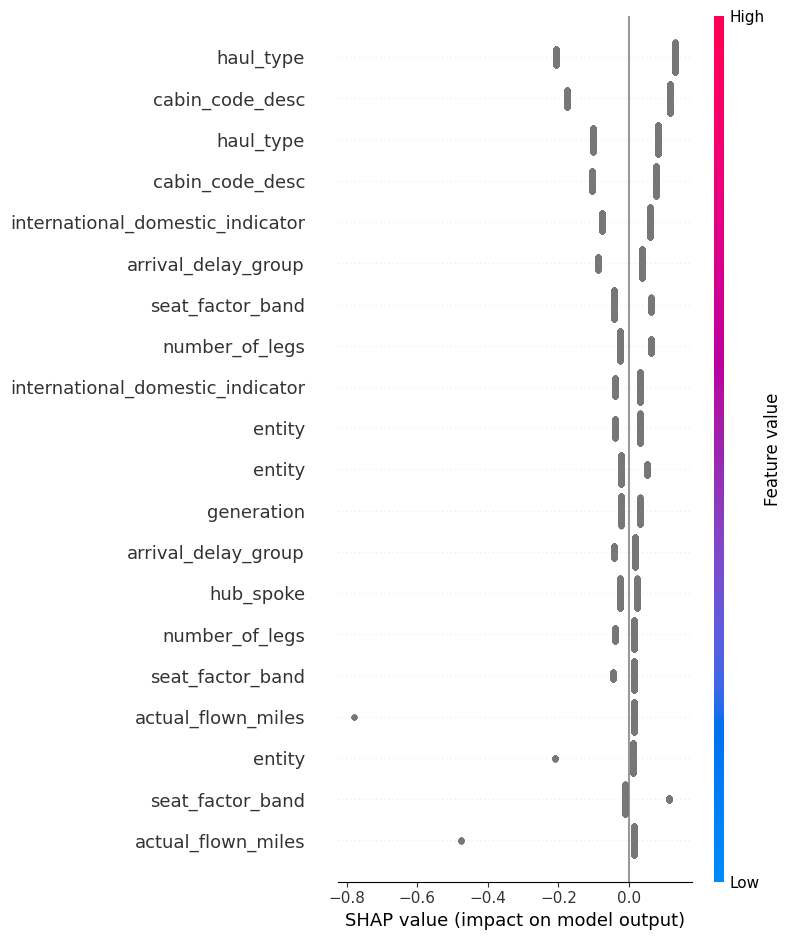

In [43]:
import shap


explainer = shap.Explainer(logreg, x_train_encoded)

shap_values = explainer(x_test_encoded)

shap.summary_plot(shap_values, x_test_encoded, feature_names=original_feature_names)


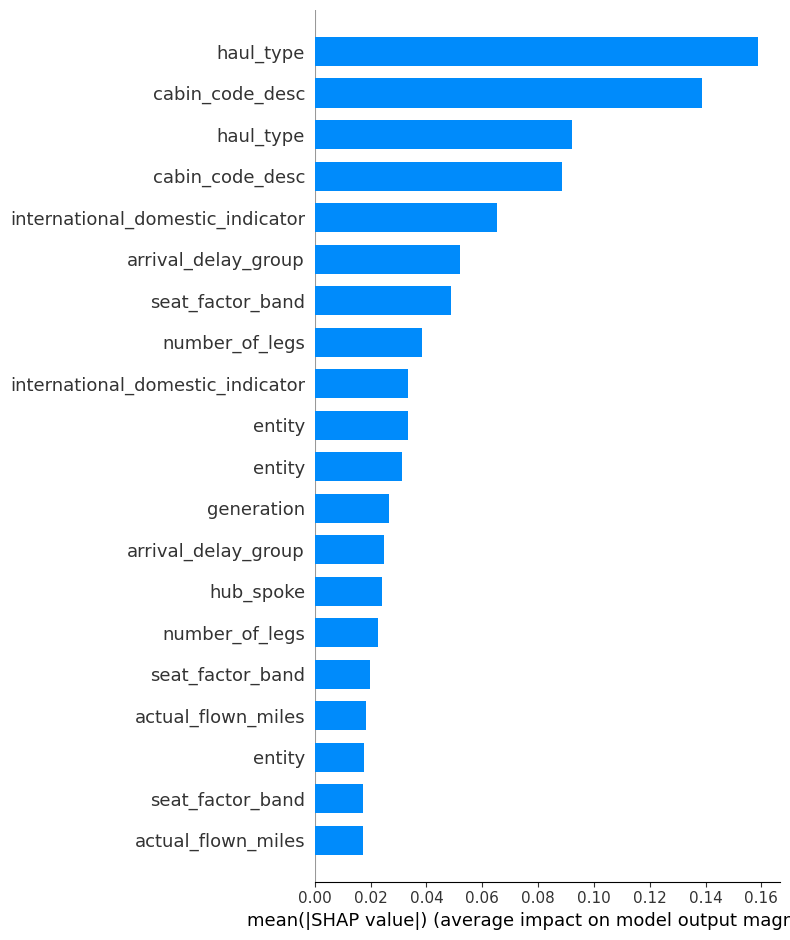

In [44]:
import shap

logreg = LogisticRegression(random_state=16, max_iter=10000)
logreg.fit(x_train_encoded, y1_train_encoded)

explainer = shap.Explainer(logreg, x_train_encoded)

shap_values = explainer(x_test_encoded)

shap.summary_plot(shap_values, feature_names=original_feature_names, plot_type="bar")


In [28]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

svm.fit(x_train_encoded, y1_train_encoded)

y_pred = svm.predict(x_test_encoded)

print('Accuracy:', accuracy_score(y1_test_encoded, y1_pred))
print('Confusion matrix:\n', confusion_matrix(y1_test_encoded, y1_pred))
print('Classification report:\n', classification_report(y1_test_encoded, y1_pred))

Accuracy: 0.7234494477485132
Confusion matrix:
 [[3368   44]
 [1258   38]]
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.99      0.84      3412
           1       0.46      0.03      0.06      1296

    accuracy                           0.72      4708
   macro avg       0.60      0.51      0.45      4708
weighted avg       0.66      0.72      0.62      4708

